In [1]:
import torch
import numpy as np

In [2]:
feature_test = torch.load("D:/github/medical_image_classification/train_extracted_feat/features_test.pth")
label_test = torch.load("D:/github/medical_image_classification/train_extracted_feat/labels_test.pth")

C:\Users\sauvi\AppData\Local\Temp\ipykernel_10248\2766734694.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  feature_test = torch.load("D:/github/medical_image_classific

In [3]:
X_test = feature_test.numpy()
y_test = label_test.numpy()

In [39]:
svm_probs = np.load('svm+gan_pred.npy')
svm_dcgan_probs = np.load('svm_pred.npy')
cnn_probs = np.load('cnn_pred.npy')
cnn_dcgan_probs = np.load('cnn+gan_pred.npy')
ann_probs = np.load('ann_pred.npy')
ann_dcgan_probs = np.load('ann+gan_pred.npy')
dt_probs = np.load('dt_pred.npy')
dt_dcgan_probs = np.load('dt+gan_pred.npy')
rf_probs = np.load('rf_pred.npy')
rf_dcgan_probs = np.load('rf+gan_pred.npy')
dense_probs = np.load('dense121_pred.npy')
dense_dcgan_probs = np.load('dense121+gan_pred.npy')

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ground truth labels
y_true = y_test  # Replace with your actual labels

# Predicted probabilities (replace with real model outputs)
models_without_dcgan = {
    "Decision Tree": dt_probs,
    "Random Forest": rf_probs,
    "SVM": svm_probs,
    "ANN": ann_probs,
    "CNN": cnn_probs,
    "DenseNet121": dense_probs
}

models_with_dcgan = {
    "Decision Tree + DCGAN": dt_dcgan_probs,
    "Random Forest + DCGAN": rf_dcgan_probs,
    "SVM + DCGAN": svm_dcgan_probs,
    "ANN + DCGAN": ann_dcgan_probs,
    "CNN + DCGAN": cnn_dcgan_probs,
    "DenseNet121 + DCGAN": dense_dcgan_probs
}

In [41]:
all_labels = np.load('labels_cnn.npy')
all_labels_ann = np.load('labels_ann.npy')

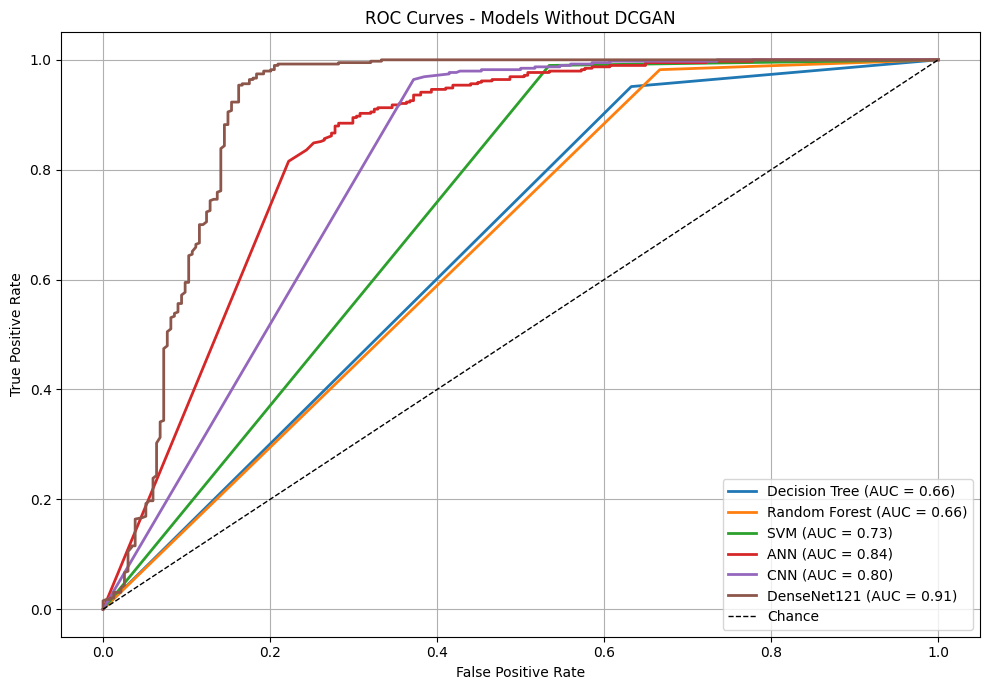

In [42]:
plt.figure(figsize=(10, 7))

for label, y_score in models_without_dcgan.items():
    if label == "CNN":
        fpr, tpr, _ = roc_curve(all_labels, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
        continue
    if label == "ANN":
        fpr, tpr, _ = roc_curve(all_labels_ann, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')
plt.title('ROC Curves - Models Without DCGAN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_all.png', dpi=500)
plt.show()

In [43]:
all_labels = np.load('labels_cnn_balance.npy')
all_labels_ann = np.load('labels_ann_balance.npy')

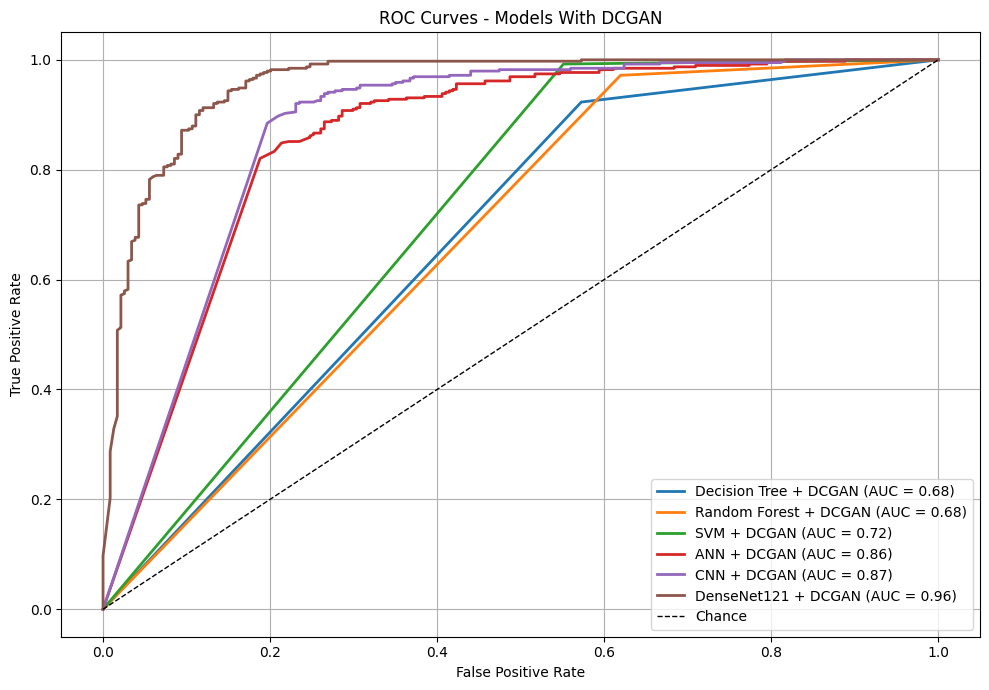

In [44]:
plt.figure(figsize=(10, 7))

for label, y_score in models_with_dcgan.items():
    if label == "CNN + DCGAN":
        fpr, tpr, _ = roc_curve(all_labels, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
        continue
    if label == "ANN + DCGAN":
        fpr, tpr, _ = roc_curve(all_labels_ann, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')
plt.title('ROC Curves - Models With DCGAN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_all_gan.png', dpi=500)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import matthews_corrcoef

In [10]:
model_predictions = {
    'Decision Tree': dt_probs,
    'Decision Tree + DCGAN': dt_dcgan_probs,
    'Random Forest': rf_probs,
    'Random Forest + DCGAN': rf_dcgan_probs,
    'SVM': svm_probs,
    'SVM + DCGAN': svm_dcgan_probs,
    'ANN': ann_probs,
    'ANN + DCGAN': ann_dcgan_probs,
    'CNN': cnn_probs,
    'CNN + DCGAN': cnn_dcgan_probs,
    'DenseNet121': dense_probs,
    'DenseNet121 + DCGAN': dense_dcgan_probs
}

In [11]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'ANN', 'CNN', 'DenseNet121']

In [12]:
mcc_without_dcgan = []
mcc_with_dcgan = []

for model in models:
    mcc_wo = matthews_corrcoef(y_true, model_predictions[model])
    mcc_w = matthews_corrcoef(y_true, model_predictions[model + ' + DCGAN'])
    mcc_without_dcgan.append(mcc_wo)
    mcc_with_dcgan.append(mcc_w)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
mcc_with_dcgan

In [ ]:
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mcc_without_dcgan, width, label='Without DCGAN', color='teal')
bars2 = ax.bar(x + width/2, mcc_with_dcgan, width, label='With DCGAN', color='coral')

# Axis labels and formatting
ax.set_ylabel('Matthews Correlation Coefficient (MCC)')
ax.set_title('MCC Comparison (With vs Without DCGAN)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)
ax.set_ylim(0, 1.0)
ax.legend()

# Annotate bar values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa_without_dcgan = []
kappa_with_dcgan = []

for model in models:
    kappa_wo = cohen_kappa_score(y_true, model_predictions[model])
    kappa_w = cohen_kappa_score(y_true, model_predictions[model + ' + DCGAN'])
    kappa_without_dcgan.append(kappa_wo)
    kappa_with_dcgan.append(kappa_w)

In [ ]:
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, kappa_without_dcgan, width, label='Without DCGAN', color='darkslateblue')
bars2 = ax.bar(x + width/2, kappa_with_dcgan, width, label='With DCGAN', color='goldenrod')

ax.set_ylabel("Cohen's Kappa Score")
ax.set_title("Cohen's Kappa Comparison (With vs Without DCGAN)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)
ax.set_ylim(0, 1.0)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()